# <span style="color:#bce35b;font-size:35px"><b>Week 5 & 6</b></span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<span style="color:#8c8c8c">Patrick Weatherford</span>

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

***
***

Importing libraries

In [7]:
import os 
import keyring

os.environ['KAGGLE_USERNAME'] = 'hakunapatata'
os.environ['KAGGLE_KEY'] = keyring.get_password(service_name='kaggle_api', username=os.environ['KAGGLE_USERNAME'])

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
from collections import deque as deq
from itertools import permutations, dropwhile, zip_longest
import re
import math
import io
import scipy
import sys
from bs4 import BeautifulSoup
import lxml
from fuzzywuzzy import fuzz
import sqlite3

%matplotlib inline


## import custom config file with keys and change working directory
class_path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University\\DSC 540 - Data Preparation'
bu_path = os.path.expanduser('~') + '\\OneDrive - Bellevue University\\Bellevue_University'
os.chdir(bu_path); import config; os.chdir(class_path)


## matplotlib default settings
plt.style.use('dark_background')
mpl.rcParams.update({'lines.linewidth':3})
mpl.rcParams.update({'axes.labelsize':14})
mpl.rcParams.update({'axes.titlesize':16})
mpl.rcParams.update({'axes.titleweight':'bold'})
mpl.rcParams.update({'figure.autolayout':True})
mpl.rcParams.update({'axes.grid':True, 'grid.color':'#424242', 'grid.linestyle':'--'})


In [8]:
## see list of current settings
# plt.rcParams.keys()

<br>
Instantiating random number generator

In [9]:
rng_seed = 777
rng = np.random.default_rng(rng_seed)

<br>

***

# <span style="color:#bce35b">Week Activities</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)

<br>


## <span style="color:#ae8bd5">Activity 7</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)



In [10]:
## GET response from url as html text and parse with BeautifulSoup
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
s = requests.Session()
r = s.get(url, timeout=10).text
soup = BeautifulSoup(r, 'html.parser')


In [11]:
## find tables with specific tag/class (one 1 table needed from url)
table_soup = soup.find_all('table', {'class':'wikitable sortable static-row-numbers plainrowheaders srn-white-background'})

## create a DataFrame from table found using pandas (way easy compared to manual BeautfulSoup method)
gdp_df = pd.DataFrame(pd.read_html(str(table_soup))[0])

gdp_df

Country/Territory    Region      IMF[1]            United Nations[12]  \
    Country/Territory    Region    Estimate       Year           Estimate   
0       United States  Americas  22939580.0       2021         20893746.0   
1               China      Asia  16862979.0  [n 2]2021         14722801.0   
2               Japan      Asia   5103110.0       2021          5057759.0   
3             Germany    Europe   4230172.0       2021          3846414.0   
4      United Kingdom    Europe   3108416.0       2021          2764198.0   
..                ...       ...         ...        ...                ...   
211          Kiribati   Oceania       232.0       2021              181.0   
212             Palau   Oceania       208.0       2021              264.0   
213             Nauru   Oceania       133.0       2021              135.0   
214        Montserrat  Americas         NaN        NaN               68.0   
215            Tuvalu   Oceania        65.0       2021               55.0   

               World Bank[13][14]        
          Year           Estimate  Year  
0         2020         20936600.0  2020  
1    [n 3]2020         14722731.0  2020  
2         2020          4975415.0  2020  
3         2020          3806060.0  2020  
4         2020          2707744.0  2020  
..         ...                ...   ...  
211       2020              200.0  2020  
212       2020              268.0  2019  
213       2020              118.0  2019  
214       2020                NaN   NaN  
215       2020               49.0  2020  

[216 rows x 8 columns]

<br>

Now to get rid of those pesky strings surrounded by brackets.

** column header in wiki table is grouped so will need to handle that

In [12]:
num_header_rows = len(gdp_df.columns[0]) ## number of header rows to loop through
new_col_header_dict = {f'header_{i+1}' : [] for i in range(num_header_rows)}  ## dict to put new header row names into

## go through each header row name and remove bracket'd stuff and append new row header to list in dict
for i in range(num_header_rows):
    for col_tup in gdp_df.columns:
        col = re.sub("\[.+\]","",col_tup[i])
        new_col_header_dict[f'header_{i+1}'].append(col)

## zip header rows in dict into tuple
dict_zip = zip(*new_col_header_dict.values())

## create multiindex object from tuple'd header rows
new_col_header = pd.MultiIndex.from_tuples(dict_zip)

## multiindex object to use as columns in DataFrame
new_col_header


MultiIndex([('Country/Territory', 'Country/Territory'),
            (           'Region',            'Region'),
            (              'IMF',          'Estimate'),
            (              'IMF',              'Year'),
            (   'United Nations',          'Estimate'),
            (   'United Nations',              'Year'),
            (       'World Bank',          'Estimate'),
            (       'World Bank',              'Year')],
           )

In [13]:
## replace old columns with pandas multiindex object created
gdp_df.columns = new_col_header

gdp_df

Country/Territory    Region         IMF            United Nations  \
    Country/Territory    Region    Estimate       Year       Estimate   
0       United States  Americas  22939580.0       2021     20893746.0   
1               China      Asia  16862979.0  [n 2]2021     14722801.0   
2               Japan      Asia   5103110.0       2021      5057759.0   
3             Germany    Europe   4230172.0       2021      3846414.0   
4      United Kingdom    Europe   3108416.0       2021      2764198.0   
..                ...       ...         ...        ...            ...   
211          Kiribati   Oceania       232.0       2021          181.0   
212             Palau   Oceania       208.0       2021          264.0   
213             Nauru   Oceania       133.0       2021          135.0   
214        Montserrat  Americas         NaN        NaN           68.0   
215            Tuvalu   Oceania        65.0       2021           55.0   

                World Bank        
          Year    Estimate  Year  
0         2020  20936600.0  2020  
1    [n 3]2020  14722731.0  2020  
2         2020   4975415.0  2020  
3         2020   3806060.0  2020  
4         2020   2707744.0  2020  
..         ...         ...   ...  
211       2020       200.0  2020  
212       2020       268.0  2019  
213       2020       118.0  2019  
214       2020         NaN   NaN  
215       2020        49.0  2020  

[216 rows x 8 columns]

In [14]:
## for the rows, go through each column and replace bracket'd stuff with no-value string
for col in gdp_df.columns:
    gdp_df[col].replace("\[.+\]", "", regex=True, inplace=True)

## viola! a clean DataFrame to work with!
gdp_df

Country/Territory    Region         IMF       United Nations        \
    Country/Territory    Region    Estimate  Year       Estimate  Year   
0       United States  Americas  22939580.0  2021     20893746.0  2020   
1               China      Asia  16862979.0  2021     14722801.0  2020   
2               Japan      Asia   5103110.0  2021      5057759.0  2020   
3             Germany    Europe   4230172.0  2021      3846414.0  2020   
4      United Kingdom    Europe   3108416.0  2021      2764198.0  2020   
..                ...       ...         ...   ...            ...   ...   
211          Kiribati   Oceania       232.0  2021          181.0  2020   
212             Palau   Oceania       208.0  2021          264.0  2020   
213             Nauru   Oceania       133.0  2021          135.0  2020   
214        Montserrat  Americas         NaN   NaN           68.0  2020   
215            Tuvalu   Oceania        65.0  2021           55.0  2020   

     World Bank        
       Estimate  Year  
0    20936600.0  2020  
1    14722731.0  2020  
2     4975415.0  2020  
3     3806060.0  2020  
4     2707744.0  2020  
..          ...   ...  
211       200.0  2020  
212       268.0  2019  
213       118.0  2019  
214         NaN   NaN  
215        49.0  2020  

[216 rows x 8 columns]

<br>


## <span style="color:#ae8bd5">Activity 8</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)



In [15]:
## import data from GitHub
visit_csv = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Wrangling-with-Python/master/Lesson06/Activity08/visit_data.csv'
visit_df = pd.read_csv(visit_csv)

visit_df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


<br>

Check for duplicate first,last names

In [16]:
LastFirst = visit_df['last_name'] + ',' + visit_df['first_name']
LastFirst.dropna(inplace=True)

LastFirst

0              Dahl,Sonny
2               Armal,Gar
3           Nulty,Chiarra
5      Ingerfield,Raymund
6       Dagnan,Wilhelmina
              ...        
991          Hafford,Alfi
992        Goldsby,Nancey
995       Pickover,Averil
996      Hallewell,Walton
998       Terron,Sapphira
Length: 704, dtype: object

<br>

Fuzzy matching at a .7 ratio pulled valules but no duplicates are apparent.

In [17]:
def FindDups(col, ratio_greater_than=80, fuzz_type='ratio'):
    match_check_dict = {i : [] for i in col}
    for target in col:
        for check in col:
            match_ratio = getattr(fuzz, fuzz_type)(target, check)
            if match_ratio > ratio_greater_than:
                match_check_dict[target].append(check)
            else:
                continue

    match_dict = {}
    for k, v in match_check_dict.items():
        if len(v) == 1:
            continue
        else:
            match_dict[k] = v

    return match_dict
    

FindDups(col=LastFirst, ratio_greater_than=70, fuzz_type='ratio')

{'Thowes,Nikita': ['Thowes,Nikita', 'Thowes,Rickie'],
 'Eat,Charline': ['Eat,Charline', 'Eade,Marline'],
 'Pasque,Godfree': ['Pasque,Godfree', 'Hulle,Godfree'],
 'Eade,Marline': ['Eat,Charline', 'Eade,Marline'],
 'Crosthwaite,Bartolomeo': ['Crosthwaite,Bartolomeo',
  'Crosthwaite,Jeramie',
  'Ganforthe,Bartolomeo'],
 'Beard,Gerrie': ['Beard,Gerrie', 'Bremner,Gerri'],
 'Thowes,Rickie': ['Thowes,Nikita', 'Thowes,Rickie'],
 'Crosthwaite,Jeramie': ['Crosthwaite,Bartolomeo', 'Crosthwaite,Jeramie'],
 'Bremner,Gerri': ['Beard,Gerrie', 'Bremner,Gerri'],
 'Ganforthe,Bartolomeo': ['Crosthwaite,Bartolomeo', 'Ganforthe,Bartolomeo'],
 'Hulle,Godfree': ['Pasque,Godfree', 'Hulle,Godfree']}

<br>

Check if any essential column contains NaN. 

Hmm, somewhat vague. How do you define essential? What outcome or goal are we trying to achieve with the data? What will we be using the data for? These are questions I would ask before assuming what data is essential for analysis.

Regardless however, let's see how many Null values there are for each column.

In [18]:
for col in visit_df.columns:
    nan_count = visit_df[col].isna().sum()
    print(f'{col}: {nan_count}')

id: 0
first_name: 296
last_name: 296
email: 0
gender: 505
ip_address: 0
visit: 26


In [19]:
## I would assume id is the unique identifier for the row. Will use that as the index for the DF.

visit_df.set_index('id', inplace=True)

visit_df

,first_name,last_name,email,gender,ip_address,visit
id,,,,,,
1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...
996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN


<br>

<u>Remove Outliers</u>:

Looking at the data, the only variable that could have any meaningful outliers (*opinion), would be the 'visit' variable. Will check to see if there are any outliers in that column.

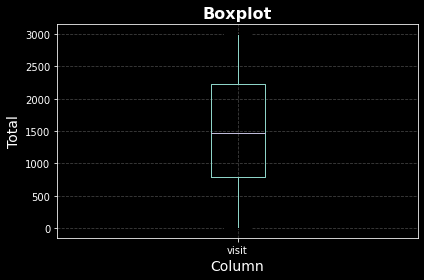

In [20]:
## view boxplot of visits variable
visit_df.boxplot(column=['visit'])
plt.xlabel('Column')
plt.ylabel('Total')
plt.title('Boxplot')
plt.show()

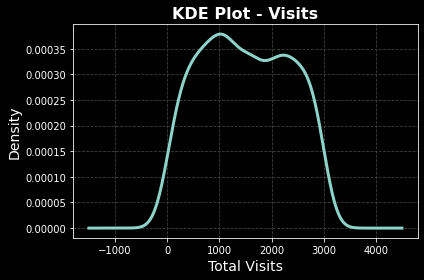

In [21]:
## view estimated probability density
visit_df['visit'].plot.kde()
plt.title('KDE Plot - Visits')
plt.xlabel('Total Visits')
plt.show()

In [22]:
## Using z-score to find outliers.
from scipy import stats

visit_mean = visit_df['visit'].mean()
visit_std = visit_df['visit'].std(ddof=1)

visit_z = (visit_df['visit'] - visit_mean) / visit_std

z_outliers = sum(visit_z.abs() > 3)

print(f'Number of |z-scores| > 3: {z_outliers}')

Number of |z-scores| > 3: 0


At this point no data has been removed from the dataset. Would need to confirm what the goal of the data is, what data is essential, and what Null values mean for visit totals. From the looks of it, a Null visit would mean that the person had 0 visits since there are no 0 values in the column but I would need to confirm this assumption. Also, based on the visit total z-scores, there are none with an absolute value > 3.

<br>


## <span style="color:#ae8bd5">SQLite</span>
<!-- # <span style="color:#bce35b;font-size:35px">Title<b>Title</b></span> -->
<!-- # <span style="color:#bce35b">H1</span> -->
<!-- ## <span style="color:#ae8bd5">H2</span> -->
<!-- ### <span style="color:#9c4957">H3</span> -->
<!-- #### <span style="color:white">H4</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Green]: <> (#bce35b)
[Purple]: <> (#ae8bd5)
[Coral]: <> (#9c4957)
[Grey]: <> (#8c8c8c)



<br>

Create DB & Table

In [23]:
with sqlite3.connect('HakunaPatata.db') as conn:
    c = conn.cursor()

In [25]:
with sqlite3.connect('HakunaPatata.db') as conn:
    c = conn.cursor()
    c.execute("""CREATE TABLE IF NOT EXISTS PATIENT (
        NAME text
        , ADDRESS text
        , CITY text
        , STATE text
        , ZIP text
        , PHONE_NUMBER text
        )""")

<br>

Creating Class/Function to INSERT into table.

In [26]:
class Patient:
    def __init__(self, name, address, city, state, zip, phone):
        self.name = name
        self.address = address
        self.city = city
        self.state = state
        self.zip = zip
        self.phone = phone

In [27]:
def NEW_PATIENT(pat, db):
    with sqlite3.connect(db) as conn:
        c = conn.cursor()
        c.execute("""INSERT INTO PATIENT VALUES (
            :NAME
            , :ADDRESS
            , :CITY
            , :STATE
            , :ZIP
            , :PHONE_NUMBER) 
            """, {
                'NAME':pat.name
                , 'ADDRESS':pat.address
                , 'CITY':pat.city
                , 'STATE':pat.state
                , 'ZIP':pat.zip
                , 'PHONE_NUMBER':pat.phone
            })

In [48]:
db = 'HakunaPatata.db'

pat1 = Patient('BOB, JOE', '111 Dirt Road Dr.', 'Cornfed', 'MS', None, 'Carrier Pigeon')

NEW_PATIENT(pat1, db=db)

In [49]:
db = 'HakunaPatata.db'
with sqlite3.connect(db) as conn:
    c = conn.cursor()
    c.execute('SELECT * FROM PATIENT')
    for patient in c.fetchall():
        print(patient)


('WEATHERFORD, PATRICK', '123 BlahBlah St.', 'Midlothian', 'TX', '76065', '555-555-5555')
('WEATHERFORD, LEIGHA', '123 BlahBlah St.', 'Midlothian', 'TX', '76065', '555-444-4444')
('WEATHERFORD, BLAKE', '123 BlahBlah St.', 'Midlothian', 'TX', '76065', None)
('BOBBY, RICKY', '3366 Speedway Blvd.', 'Lincoln', 'AL', '35096', '877-462-3342')
('VAN ROSSUM, GUIDO', '1991 Python St.', 'Fredericksburg', 'VA', '11111', '111-111-1111')
('DYNAMITE, NAPOLEON', '123 Flippin Sweet St.', 'Preston', 'ID', '17171', '333-333-3333')
('BOB, JOE', '111 Dirt Road Dr.', 'Cornfed', 'MS', None, 'Carrier Pigeon')
('BOB, JOE', '111 Dirt Road Dr.', 'Cornfed', 'MS', None, 'Carrier Pigeon')
('BOB, JOE', '111 Dirt Road Dr.', 'Cornfed', 'MS', None, 'Carrier Pigeon')
('BOB, JOE', '111 Dirt Road Dr.', 'Cornfed', 'MS', None, 'Carrier Pigeon')


<br><br>

***

### Book Practice Below

In [ ]:
odd_nums = [x for x in range(100000) if x % 2 != 0]

sys.getsizeof(odd_nums)

444376

In [ ]:
odd_nums2 = (x for x in range(100000) if x % 2 != 0)
odd_nums_list = [x for x in odd_nums2]

sys.getsizeof(odd_nums2), sys.getsizeof(odd_nums_list)

(104, 444376)

In [ ]:
list2 = []

def odd_num_gen():
    i = 1

    while True:
        if i % 2 != 0:
            yield i
            i += 1
        else:
            i += 1

for num in odd_num_gen():
    if num > 100000:
        break
    list2.append(num)

sys.getsizeof(list2)

444376

In [ ]:
l1 = [1,2,3,4,5]

l1_gen = (num for num in l1)
l1_lst = [num for num in l1_gen]
l1_lst

[1, 2, 3, 4, 5]

In [ ]:
## manual creation via Class
class gen1:
    def __init__(self, start, stop, step=1):
        self.start = start
        self.stop = stop
        self.step = step

    def __iter__(self):
        return self

    def __next__(self):
        if self.start > self.stop:
            raise StopIteration

        result = self.start
        self.start += self.step
        return result 

[i for i in gen1(start=1, stop=5, step=1)]

[1, 2, 3, 4, 5]

In [ ]:
## using the yield keyword
def gen2(start, stop, step=1):
    stop = stop + 1
    while stop > start:
        result = start
        start += step
        yield result 

[i for i in gen2(start=1, stop=5, step=1)]

[1, 2, 3, 4, 5]

In [ ]:
## using generator comprehension
start, stop, step = (1, 5, 1)
gen3 = (i for i in range(start, stop+1, step))
[i for i in gen3]

[1, 2, 3, 4, 5]